In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
diabetes_data = pd.read_csv('./diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
y = diabetes_data['Outcome'].values
X = diabetes_data.iloc[:, :-1].values #마지막 열을 제외한 다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

In [5]:
lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

In [ ]:
print('Accuracy: ',accuracy_score(y_test, pred))
print('Precision: ',precision_score(y_test, pred))
print('Recall: ',recall_score(y_test, pred))
print('F1 Score: ',f1_score(y_test, pred))
print('AUC score: ',roc_auc_score(y_test, pred))

Accuracy:  0.7727272727272727
Precision:  0.7111111111111111
Recall:  0.5925925925925926
F1 Score:  0.6464646464646464
AUC score:  0.7312962962962962


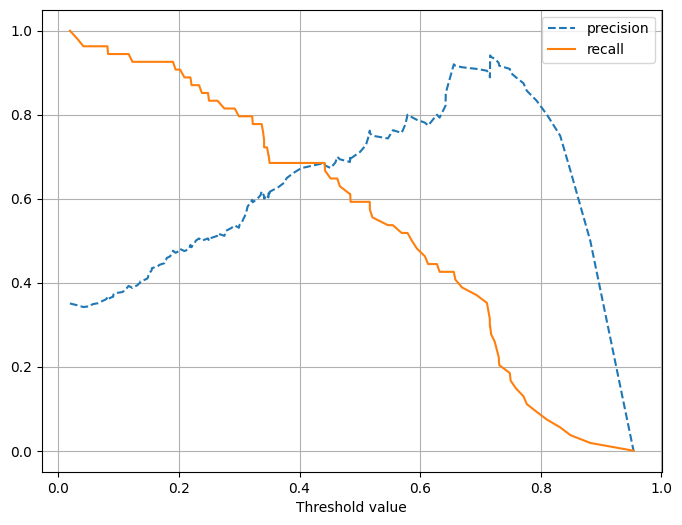

In [7]:
#precision recall curve
#precision과 recall의 trade-off를 시각화

#테스트 데이터에 대한 클래스별 예측 확률을 반환. [:,1]이라면 양성 클래스, 즉 당뇨병만 뽑아
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:len(thresholds)],
         linestyle='--', label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.xlabel('Threshold value')
plt.legend(); plt.grid()
plt.show()

추가로 설명을 하자면...
thresholds가 0.3일때. 0.3 이상은 클래스 label =1. 0.3 미만은 클래스 label =0.
thresholds가 낮을 때는 많은 양을 1로 예측하기에 recall up. precision down.
thresholds가 높을 때는 적은 양을 1로 예측하기에 recall down. precision up.

In [8]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

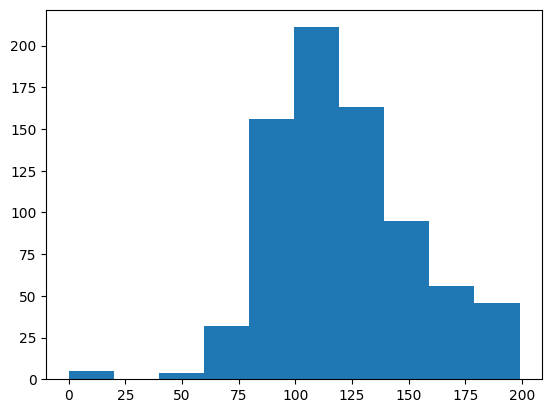

In [9]:
#bins=10을 통해 10개의 구간으로 data 나눠.
#근데 그냥 hist를 했으니 10개 구간이 명확히 히스토그램에는 안나타나는 모습.
plt.hist(diabetes_data['Glucose'], bins=10)

In [10]:
#각 칼럼별 0의 갯수 조사
(diabetes_data == 0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
#0인 데이터를 각 칼럼의 평균값으로 조정
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[zero_features] = \
    diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())


In [12]:
(diabetes_data == 0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
y= diabetes_data['Outcome'].values
X = diabetes_data.iloc[:,:-1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#stratify를 통해 레이블 y의 클래스 비율을 훈련/테스트 셋에 똑같이 유지
X_train, X_test, y_train, y_test =\
    train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)


In [14]:
print('Accuracy: ',accuracy_score(y_test, pred))
print('Precision: ',precision_score(y_test, pred))
print('Recall: ',recall_score(y_test, pred))
print('F1 Score: ',f1_score(y_test, pred))
print('AUC score: ',roc_auc_score(y_test, pred))

Accuracy:  0.7987012987012987
Precision:  0.7674418604651163
Recall:  0.6111111111111112
F1 Score:  0.6804123711340206
AUC score:  0.7555555555555556


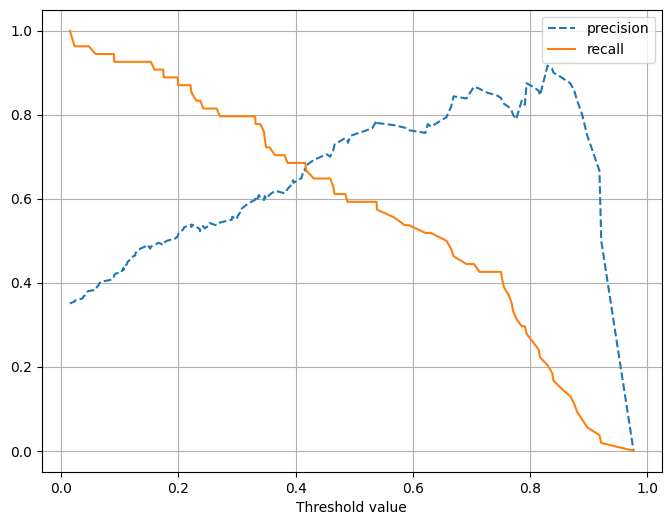

In [15]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precisions, revalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:len(thresholds)], linestyle='--', label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.xlabel('Threshold value')
plt.legend(); plt.grid()
plt.show()

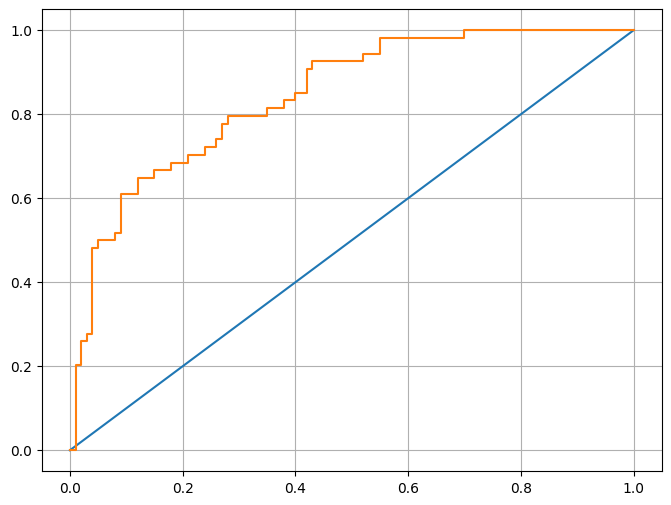

In [16]:
pred_proba = lr_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(8,6))
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()